In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os
import warnings

warnings.filterwarnings('ignore')

# Cria o diretório para salvar as imagens (pasta 'outputs' dentro da pasta do projeto)
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Ambiente configurado e pasta 'outputs' criada.")

Ambiente configurado e pasta 'outputs' criada.


In [2]:
print("\n--- Etapa 1: Exploração dos Dados (Carregamento) ---")

# URLs dos dados Statlog (Landsat Satellite)
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn'
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst'

# Carrega e combina os datasets (separados por espaço)
df_train = pd.read_csv(url_train, sep=' ', header=None)
df_test = pd.read_csv(url_test, sep=' ', header=None)
df_full = pd.concat([df_train, df_test])

# Define os nomes das colunas (36 features + 1 target)
col_names = [f'feature_{i}' for i in range(1, 37)] + ['target']
df_full.columns = col_names

print("Dataset de Satélite (Statlog) carregado e combinado.")
display(df_full.head())


--- Etapa 1: Exploração dos Dados (Carregamento) ---
Dataset de Satélite (Statlog) carregado e combinado.


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3



--- Etapa 1: Exploração dos Dados (Análise) ---

Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature_1   6435 non-null   int64
 1   feature_2   6435 non-null   int64
 2   feature_3   6435 non-null   int64
 3   feature_4   6435 non-null   int64
 4   feature_5   6435 non-null   int64
 5   feature_6   6435 non-null   int64
 6   feature_7   6435 non-null   int64
 7   feature_8   6435 non-null   int64
 8   feature_9   6435 non-null   int64
 9   feature_10  6435 non-null   int64
 10  feature_11  6435 non-null   int64
 11  feature_12  6435 non-null   int64
 12  feature_13  6435 non-null   int64
 13  feature_14  6435 non-null   int64
 14  feature_15  6435 non-null   int64
 15  feature_16  6435 non-null   int64
 16  feature_17  6435 non-null   int64
 17  feature_18  6435 non-null   int64
 18  feature_19  6435 non-null   int64
 19  feat

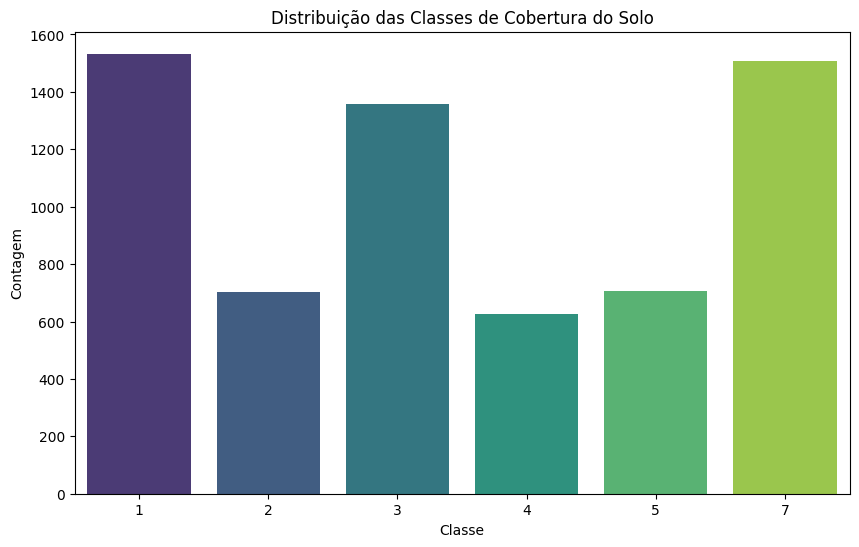

In [3]:
print("\n--- Etapa 1: Exploração dos Dados (Análise) ---")

print("\nInformações Gerais:")
df_full.info()

print("\nGerando plot de distribuição de classes...")
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df_full, palette='viridis')
plt.title('Distribuição das Classes de Cobertura do Solo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.savefig(f'{output_dir}/1_distribuicao_classes.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
print("\n--- Etapa 2: Pré-processamento ---")

# Verificação de valores ausentes: o dataset é limpo.
# Separando features (X) e target (y)
X = df_full.drop('target', axis=1)
y = df_full['target']

# Normalização (Padronização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Dados padronizados.")

# Etapa 3: Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Divisão concluída: Treino={X_train.shape[0]}, Teste={X_test.shape[0]}")

# Etapa 4: Treinamento do Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print(">>> Modelo Random Forest treinado com sucesso.")


--- Etapa 2: Pré-processamento ---
Dados padronizados.
Divisão concluída: Treino=5148, Teste=1287
>>> Modelo Random Forest treinado com sucesso.



--- Etapa 5: Avaliação do Modelo ---
Acurácia do Modelo: 0.9091

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       307
           2       0.99      0.96      0.97       141
           3       0.87      0.97      0.92       272
           4       0.77      0.58      0.66       125
           5       0.93      0.87      0.90       141
           7       0.90      0.91      0.90       301

    accuracy                           0.91      1287
   macro avg       0.90      0.88      0.89      1287
weighted avg       0.91      0.91      0.91      1287



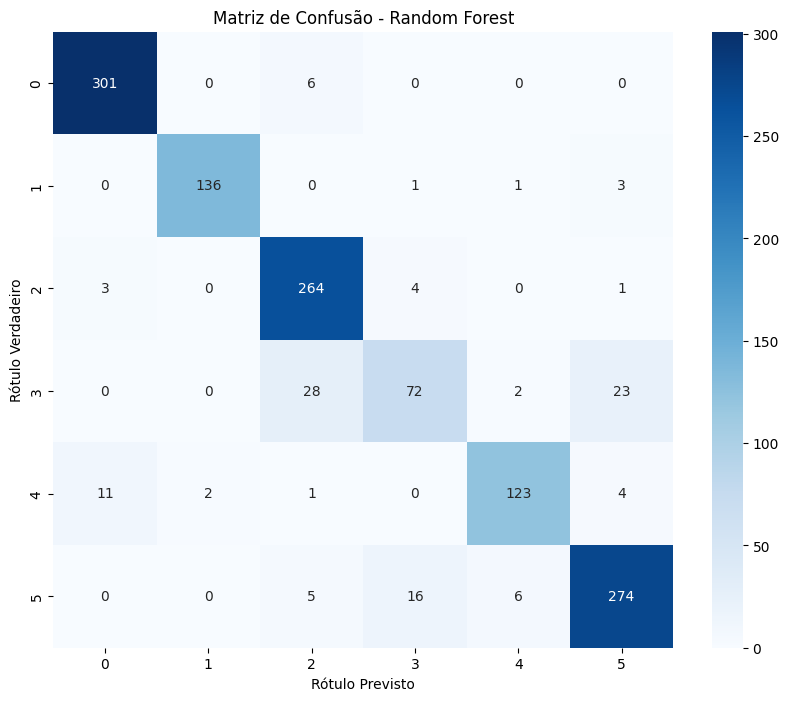

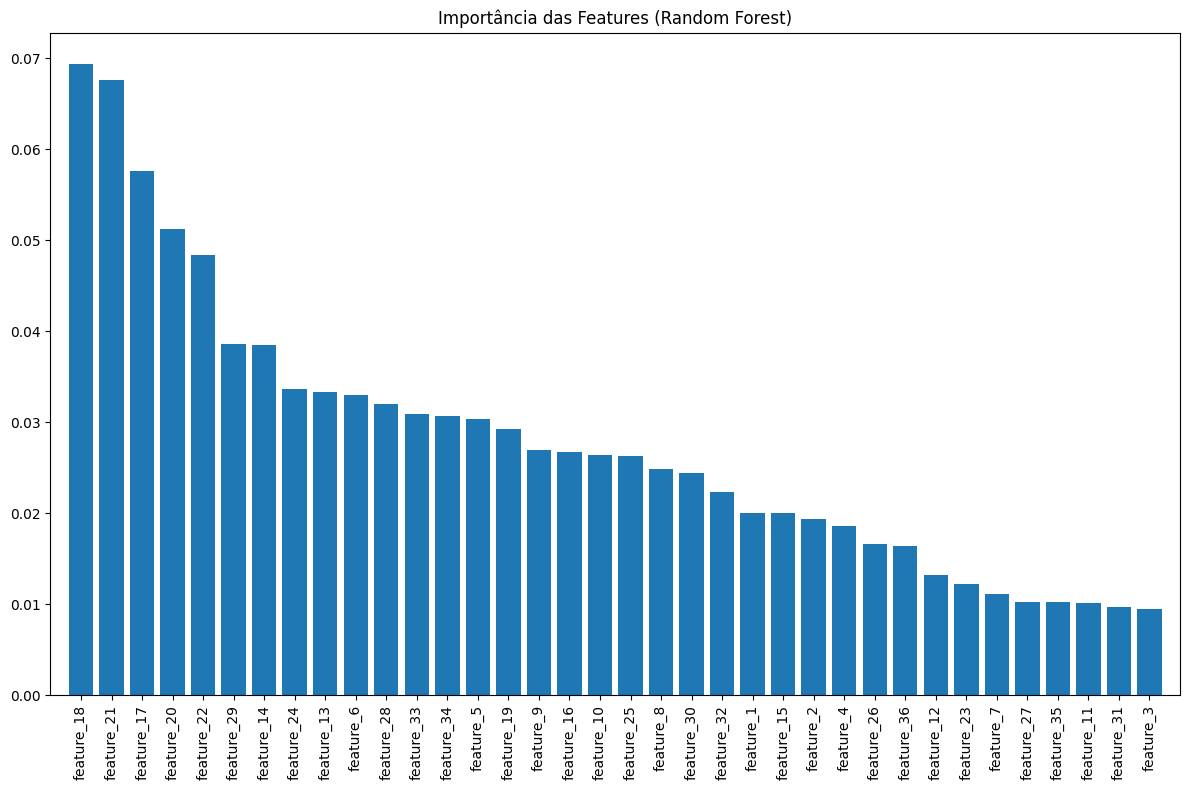

In [5]:
print("\n--- Etapa 5: Avaliação do Modelo ---")

# Fazendo predições e calculando acurácia
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Gerando a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.savefig(f'{output_dir}/2_matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise de Importância das Features (para o relatório)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.title("Importância das Features (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig(f'{output_dir}/3_importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()